In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.interpolate import interp1d
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

### Define Keys

In [3]:

integrate_keys_all = ['Str1GiessGeschwInMproMin',
 'Str1WasserZ1DiefflenInLproMin',
 'Str1WasserZ1DillingenInLproMin',
 'Str1WasserZ1FsInLproMin',
 'Str1WasserZ1LsInLproMin',
 'Str1WasserZ2aFsInLproMin',
 'Str1WasserZ2aLsInLproMin',
 'Str1WasserZ2bFsInLproMin',
 'Str1WasserZ2bLsInLproMin',
 'Str1WasserZ3aFsInLproMin',
 'Str1WasserZ3aLsInLproMin',
 'Str1WasserZ3bFsInLproMin',
 'Str1WasserZ3bLsInLproMin',
 'Str1WasserZ4FsInLproMin',
 'Str1WasserZ4LsInLproMin',
 'Str1WasserZ5FsInLproMin',
 'Str1WasserZ5LsInLproMin',
 'Str2GiessGeschwInMproMin',
 'Str2WasserZ1DiefflenInLproMin',
 'Str2WasserZ1DillingenInLproMin',
 'Str2WasserZ1FsInLproMin',
 'Str2WasserZ1LsInLproMin',
 'Str2WasserZ2aFsInLproMin',
 'Str2WasserZ2aLsInLproMin',
 'Str2WasserZ2bFsInLproMin',
 'Str2WasserZ2bLsInLproMin',
 'Str2WasserZ3aFsInLproMin',
 'Str2WasserZ3aLsInLproMin',
 'Str2WasserZ3bFsInLproMin',
 'Str2WasserZ3bLsInLproMin',
 'Str2WasserZ4FsInLproMin',
 'Str2WasserZ4LsInLproMin',
 'Str2WasserZ5FsInLproMin',
 'Str2WasserZ5LsInLproMin']


delta_keys_all = ['Str1GiessLaengeSequenzInM',
              'Str2GiessLaengeSequenzInM',
              'Str2AusfLaengeSchmelzeInM',
              'Str1AusfLaengeSchmelzeInM']

#### Strand 1 keys

In [4]:
str1_keys = ['TundishTemperaturInC',
 'Str1TempMittelLsInC',
 'Str1TempMittelFsInC',
 'Str1WasserZ4FsInLproMin',
 'Str1WasserZ4LsInLproMin',
 'Str1WasserZ2bFsInLproMin',
 'Str1WasserZ2bLsInLproMin',
 'Str1WasserZ3bFsInLproMin',
 'Str1WasserZ1FsInLproMin',
 'Str1WasserZ3bLsInLproMin',
 'Str1WasserZ1LsInLproMin',
 'Str1WasserZ3aFsInLproMin',
 'Str1WasserZ3aLsInLproMin',
 'Str1WasserZ2aLsInLproMin',
 'Str1WasserZ2aFsInLproMin',
 'Str1WasserZ5LsInLproMin',
 'Str1WasserZ5FsInLproMin',
 'Str1WasserZ1DiefflenInLproMin',
 'Str1WasserZ1DillingenInLproMin',
 'Str1GiessLaengeSchmelzeInM',
 'Str1GiessLaengeSequenzInM',
 'Str1AusfLaengeSchmelzeInM',
 'Str1GiessGeschwInMproMin',]

delta_keys_1 = ['Str1GiessLaengeSequenzInM',
              'Str1AusfLaengeSchmelzeInM']

integrate_keys_1 = [e for e in str1_keys if e not in ('TundishTemperaturInC',
                                                 'Str1TempMittelLsInC',
                                                 'Str1TempMittelFsInC',
                                                 'Str1GiessLaengeSchmelzeInM',
                                                 'Str1GiessLaengeSequenzInM',
                                                 'Str1AusfLaengeSchmelzeInM',)]  
temperature_keys_1 = ['Str1TempMittelLsInC',
                    'Str1TempMittelFsInC',]

cols_schmelzen_str1 = ['ChargenNr',
 'ChargenNrErsteSchmInSeq',
 'GiessBeginnSchmelze',
 'GiessBeginn_DateTime',
 'GiessEndeSchmelze',
 'GiessEnde_DateTime',
 'EndeSchmelze',
 'Ende_DateTime',
 'NrSchmelzeInSequenz',
 'LiquidusTempInC',
 'SolidusTempInC',
 'UeberhitzungMittelInK',
 'ZielTempTreiberInC',
 'Str1SollGiessGeschwInMproMin',
 'Str1Format',
 'C-Aequiv01',
 'C-Aequiv02',
 'C-AequivP']

#### Strand 2 keys

In [5]:
str2_keys = [
 'TundishTemperaturInC',
 'Str2TempMittelLsInC',
 'Str2TempMittelFsInC',
 'Str2WasserZ1FsInLproMin',
 'Str2WasserZ1LsInLproMin',
 'Str2WasserZ2bFsInLproMin',
 'Str2WasserZ4FsInLproMin',
 'Str2WasserZ4LsInLproMin',
 'Str2WasserZ3bLsInLproMin',
 'Str2WasserZ3bFsInLproMin',
 'Str2WasserZ1DiefflenInLproMin',
 'Str2WasserZ2bLsInLproMin',
 'Str2WasserZ1DillingenInLproMin',
 'Str2WasserZ2aLsInLproMin',
 'Str2WasserZ2aFsInLproMin',
 'Str2WasserZ5FsInLproMin',
 'Str2GiessLaengeSchmelzeInM',
 'Str2WasserZ5LsInLproMin',
 'Str2GiessLaengeSequenzInM',
 'Str2WasserZ3aFsInLproMin',
 'Str2WasserZ3aLsInLproMin',
 'Str2AusfLaengeSchmelzeInM',
 'Str2GiessGeschwInMproMin']

delta_keys_2 = ['Str2GiessLaengeSequenzInM',
              'Str2AusfLaengeSchmelzeInM',]
            
integrate_keys_2 = [e for e in str2_keys if e not in ('TundishTemperaturInC',
                                                 'Str2TempMittelLsInC',
                                                 'Str2TempMittelFsInC',
                                                 'Str2GiessLaengeSchmelzeInM',
                                                 'Str2GiessLaengeSequenzInM',
                                                 'Str2AusfLaengeSchmelzeInM',
                                                 )]

temperature_keys_2 = ['Str2TempMittelLsInC',
                    'Str2TempMittelFsInC',]
            
cols_schmelzen_str2 = ['ChargenNr',
 'ChargenNrErsteSchmInSeq',
 'GiessBeginnSchmelze',
 'GiessBeginn_DateTime',
 'GiessEndeSchmelze',
 'GiessEnde_DateTime',
 'EndeSchmelze',
 'Ende_DateTime',
 'NrSchmelzeInSequenz',
 'LiquidusTempInC',
 'SolidusTempInC',
 'UeberhitzungMittelInK',
 'ZielTempTreiberInC',
 'Str2SollGiessGeschwInMproMin',
 'Str2Format',
 'C-Aequiv01',
 'C-Aequiv02',
 'C-AequivP']

## Combinde time series and cross section data

### Prepare Time Series Data
Since only 10 data samples can be shown, the first data preparation steps where we combine all the data, cannot be done. To demonstrate the functionality of the code, we transform the data in 1s steps and perform the first steps. Because of the limited data, the time series data and the cross correlation data cannot be combined.
For the rest of the code we use the first 10 samples of the original combined data, as we will see later.

### This preparation is independent from the rest and only demostrates the functionality oft the code. The data used for the rest of the code is already prepared.

In [6]:
from pathlib import Path
data_dir = Path("../data/ts_data/")

data = {}
for csv_file in data_dir.glob("*.csv"):
        
    this_csv = pd.read_csv(csv_file, delimiter=",")
    
    this_csv['DATE_TIME'] = pd.to_datetime(this_csv['TIME'],unit='s').dt.tz_localize("UTC")
    this_csv = this_csv.set_index('DATE_TIME', drop=False).sort_index()
    
    data[csv_file.stem] = this_csv.sort_values("TIME")

### Preprocess Time Series Data

In [7]:
frequency = '1s'

rng = pd.date_range(start='2019-03-01 00:07:00+00:00', end='2019-03-01 00:09:00+00:00', freq=frequency)
df_times = pd.DataFrame({'DateTime': rng})
df_times['ts'] = df_times.DateTime.values.astype(np.int64) // 10**9    #np arry by values, then 10**9 for s

### For demonstration only for strand 1

In [8]:
keys = str1_keys
delta_keys = delta_keys_1
integrate_keys = integrate_keys_1
GiessLaengeSchmelzeInM = "Str1GiessLaengeSchmelzeInM"
GiessLaengeSequenzInM = "Str1GiessLaengeSequenzInM"
AusfLaengeSchmelzeInM = 'Str1AusfLaengeSchmelzeInM'
cols_schmelzen = cols_schmelzen_str1
temperature = 'Str1TempMittelLsInC'
temp_keys = temperature_keys_1

### Interpolation

In [9]:
data_interval = {}
for i in keys:
    datetime = data[i]['TIME'].to_numpy()
    value = data[i][i].to_numpy()
    interpolate = interp1d(datetime,value, kind='linear')
    new_datetime = df_times['ts'].to_numpy()
   
    interp_array = interpolate(new_datetime)
    df_interp = pd.DataFrame({'DATE_TIME':new_datetime , i: interp_array, 'TIME': new_datetime})
    df_interp['DATE_TIME'] = pd.to_datetime(df_interp['DATE_TIME'],unit='s').dt.tz_localize("UTC")
    data_interval[i] = df_interp

### Integration

In [10]:
import scipy
def integrate(X):
        Y = [interpolate(x) for x in X]
        return scipy.integrate.trapz(Y,X, dx=1)


def trapz_integration(end_s):
    end_m = end_s / 60
    begin_m = end_m - 1
    try:
        return integrate([begin_m, end_m])
    except ValueError:
        return np.nan

for i in integrate_keys:
    minutes = data[i]['TIME'].to_numpy() / 60
    value = data[i][i].to_numpy()
    interpolate = interp1d(minutes,value, kind='linear')
    data_interval[i][i + '_integr'] = data_interval[i]["TIME"].apply(trapz_integration)

### Mean for the temperatures

In [11]:
def temp_mean(end_s):
    end_m = end_s / 60
    begin_m = end_m - 1
    try:
        return (1 / (end_m - begin_m)) * integrate([begin_m, end_m])
    except ValueError:
        return np.nan

for i in temp_keys:
    minutes = data[i]['TIME'].to_numpy() / 60
    value = data[i][i].to_numpy()
    interpolate = interp1d(minutes,value, kind='linear')
    data_interval[i][i + '_old'] = data_interval[i][i]
    data_interval[i][i] = data_interval[i]["TIME"].apply(temp_mean)

### Merging TS-Datasets

In [12]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE_TIME', 'TIME'],
                                            how='outer'), data_interval.values())
df_merged = df_merged.set_index('DATE_TIME', drop=False).sort_index()
    

### Import and further Preprocessing of cross section data

In [13]:
df_schmelzen = pd.read_csv("../data/df_schmelzen.csv", delimiter=",")

#### Add 90 minutes to the end of the last melting process of a sequence

In [14]:
df_schmelzen['EndeSchmelze'] = df_schmelzen['GiessEndeSchmelze']

df_schmelzen['ChargenNrErsteSchmInSeq_shifted'] = df_schmelzen['ChargenNrErsteSchmInSeq'].shift(-1)
df_schmelzen = df_schmelzen.fillna(0)

def add_time_to_end(row):               
        if row['ChargenNrErsteSchmInSeq'] !=  row['ChargenNrErsteSchmInSeq_shifted']:
            row['EndeSchmelze'] = row['EndeSchmelze'] + 90*60   #add 90 min to end of last 'GiessEnde' 
        return row

df_schmelzen = df_schmelzen.apply(add_time_to_end, axis=1)

df_schmelzen['Ende_DateTime'] = pd.to_datetime(df_schmelzen['EndeSchmelze'],unit='s').dt.tz_localize("UTC")

df_schmelzen = df_schmelzen.drop("ChargenNrErsteSchmInSeq_shifted", axis=1)

df_schmelzen = df_schmelzen[cols_schmelzen]

### Combine Datasets
Because only limited data is available, the here prepared time series data cannot be combind with cross section data. 
We therefore use the 10 first samples of the original combined data as we will see later.


In [15]:
# merged_rows = []

# for _, row in df_merged.iterrows():
#     schmelze = df_schmelzen[(df_schmelzen["GiessBeginn_DateTime"] < row["DATE_TIME"]) & (df_schmelzen["Ende_DateTime"] >= row["DATE_TIME"])]
#     if len(schmelze) != 1:
#         continue
#     merged_rows.append(pd.concat([row.to_frame().transpose().reset_index(drop=True), schmelze.reset_index(drop=True)], axis=1))

# combined_df = pd.concat(merged_rows)
# combined_df = combined_df.reset_index(drop=True)

# Further data preparation

From now on we use the first 10 samples of the original combined data, after the first meter of the strand has passes the pyrometer, to have 10 meaning full samples.

## Data for Strand 1

### Read combined data

In [16]:
combined_df = pd.read_csv("../data/combined_df_str1.csv", delimiter=",")

### Set keys

In [17]:
keys = str1_keys
delta_keys = delta_keys_1
integrate_keys = integrate_keys_1
GiessLaengeSchmelzeInM = "Str1GiessLaengeSchmelzeInM"
GiessLaengeSequenzInM = "Str1GiessLaengeSequenzInM"
AusfLaengeSchmelzeInM = 'Str1AusfLaengeSchmelzeInM'
cols_schmelzen = cols_schmelzen_str1
temperature = 'Str1TempMittelLsInC'
temp_keys = temperature_keys_1

## Calculate delta of length attributes

### delta for length of each melt

In [18]:
grouped = combined_df[GiessLaengeSchmelzeInM].groupby(combined_df['ChargenNr'])

schmelzen_length = {}
for name, group in grouped:
    schmelzen_length[name] = pd.DataFrame(group)
    schmelzen_length[name][GiessLaengeSchmelzeInM +'_delta'] = schmelzen_length[name].diff()
    if schmelzen_length[name][GiessLaengeSchmelzeInM].iloc[0] == 0:
        schmelzen_length[name] = schmelzen_length[name].fillna(0)
    else:
          schmelzen_length[name] = schmelzen_length[name].fillna(
                            schmelzen_length[name][GiessLaengeSchmelzeInM +'_delta'].iloc[1])
                
schmelzen_merged = pd.DataFrame()
for char_nr in list(schmelzen_length.keys()):
     schmelzen_merged = pd.concat([schmelzen_merged,schmelzen_length[char_nr]], axis=0)

### delta for length of sequence and  length extraction

In [19]:
sequence_merged = {}
for key in delta_keys:
    grouped = combined_df[key].groupby(combined_df['ChargenNrErsteSchmInSeq'])
    sequence_length = {}
    for name, group in grouped:
        sequence_length[name] = pd.DataFrame(group)
        sequence_length[name][key +'_delta'] = sequence_length[name].diff()
        if sequence_length[name][key].iloc[0] == 0:
            sequence_length[name] = sequence_length[name].fillna(0)
        else:
            sequence_length[name] = sequence_length[name].fillna(
                                sequence_length[name][key +'_delta'].iloc[1])
    for seq_nr in list(sequence_length.keys()):
         sequence_merged[key] = pd.concat(list(sequence_length.values()), axis=0)

### Combine deltas with data

In [20]:
conc1 = pd.concat([sequence_merged[delta_keys[0]][delta_keys[0] +'_delta'],sequence_merged[
    delta_keys[1]][delta_keys[1] +'_delta']], axis=1)
conc2 = pd.concat([conc1,schmelzen_merged[GiessLaengeSchmelzeInM +'_delta']], axis=1)
combined_df = pd.concat([combined_df,conc2], axis=1)

## Outlier detection: 
### Get Outliers concerning lenght of melts

#### Look at maximum of melt length
Since we only have 10 data samples and therefore not the whole sequence, the maximum length of the sequences is small. We can not conduct the outlier analysis on only those 10 samples, since we would label the sequence at hand as an outlier and delete it. For all the data, the code looks as follows:

In [21]:
# combined_df_max = combined_df_grouped[laengeSchmelze].max().to_frame()
# laengeSchmelze_max = laengeSchmelze + '_max'
# combined_df_max = combined_df_max.rename(columns={laengeSchmelze: laengeSchmelze_max})
# combined_df_max = combined_df_max.reset_index(drop=False)

# schmelzen_drop = combined_df_max[combined_df_max[laengeSchmelze_max]<10]
# schmelzen_drop = schmelzen_drop['ChargenNr'].to_numpy()
# schmelzen_drop

In [22]:
schmelzen_drop = []

#### look at minimum of melt length
Again the outlier analyse on only those 10 samples does not make sense. Anyway looking at the minimum length, there is no outlier in the 10 samples

In [23]:
combined_df_grouped = combined_df.groupby(combined_df['ChargenNr'])
combined_df_min = combined_df_grouped[GiessLaengeSchmelzeInM].min().to_frame()
laengeSchmelze_min = GiessLaengeSchmelzeInM + '_min'
combined_df_min = combined_df_min.rename(columns={GiessLaengeSchmelzeInM: laengeSchmelze_min})
combined_df_min = combined_df_min.reset_index(drop=False)

s = combined_df_min[combined_df_min[laengeSchmelze_min]>10]
s = s['ChargenNr'].to_numpy()
schmelzen_drop = np.append(schmelzen_drop,s)

#### identify the sequences of schmelzen_drop

In [24]:
schmelzen = combined_df.copy()
schmelzen = schmelzen.set_index('ChargenNr',drop=True)

seq_drop = schmelzen.loc[schmelzen_drop]

seq_drop = seq_drop['ChargenNrErsteSchmInSeq']
seq_drop = seq_drop.drop_duplicates(keep='first')
seq_drop = seq_drop.reset_index(drop=True)
seq_drop

Series([], Name: ChargenNrErsteSchmInSeq, dtype: int64)

#### delete sequences with outliers

In [25]:
combined_df = combined_df.set_index(combined_df['ChargenNrErsteSchmInSeq'],drop=True)
df_str_1 = combined_df.drop(seq_drop, axis=0)
df_str_1 = df_str_1.reset_index(drop=True)

### Rename Columns

In [26]:
df_str_1['strang_nr'] = 1
df_str_1 = df_str_1.sort_values("TIME")
df_str_1 = df_str_1.reset_index(drop=True)

df_str_1.rename(columns={'delta_x':'GiessLaengeSchmelzeInM_delta', 'delta_y':'GiessLaengeSequenzInM_delta',
             'delta':'AusfLaengeSchmelzeInM_delta'}, inplace=True)

df_str_1.columns = df_str_1.columns.str.replace('Str1', '') 

## Data for Strand 2

### Read combined data

In [27]:
combined_df = pd.read_csv("../data/combined_df_str2.csv", delimiter=",")

### Set keys

In [28]:
keys = str2_keys
delta_keys = delta_keys_2
integrate_keys = integrate_keys_2
GiessLaengeSchmelzeInM = "Str2GiessLaengeSchmelzeInM"
GiessLaengeSequenzInM = "Str2GiessLaengeSequenzInM"
AusfLaengeSchmelzeInM = 'Str2AusfLaengeSchmelzeInM'
cols_schmelzen = cols_schmelzen_str2
temperature = 'Str2TempMittelLsInC'
temp_keys = temperature_keys_2

## Calculate delta of length attributes

### delta for length of each melt

In [29]:
grouped = combined_df[GiessLaengeSchmelzeInM].groupby(combined_df['ChargenNr'])

schmelzen_length = {}
for name, group in grouped:
    schmelzen_length[name] = pd.DataFrame(group)
    schmelzen_length[name][GiessLaengeSchmelzeInM +'_delta'] = schmelzen_length[name].diff()
    if schmelzen_length[name][GiessLaengeSchmelzeInM].iloc[0] == 0:
        schmelzen_length[name] = schmelzen_length[name].fillna(0)
    else:
          schmelzen_length[name] = schmelzen_length[name].fillna(
                            schmelzen_length[name][GiessLaengeSchmelzeInM +'_delta'].iloc[1])
                
schmelzen_merged = pd.DataFrame()
for char_nr in list(schmelzen_length.keys()):
     schmelzen_merged = pd.concat([schmelzen_merged,schmelzen_length[char_nr]], axis=0)

### delta for length of sequence and  length extraction

In [30]:
sequence_merged = {}
for key in delta_keys:
    grouped = combined_df[key].groupby(combined_df['ChargenNrErsteSchmInSeq'])
    sequence_length = {}
    for name, group in grouped:
        sequence_length[name] = pd.DataFrame(group)
        sequence_length[name][key +'_delta'] = sequence_length[name].diff()
        if sequence_length[name][key].iloc[0] == 0:
            sequence_length[name] = sequence_length[name].fillna(0)
        else:
            sequence_length[name] = sequence_length[name].fillna(
                                sequence_length[name][key +'_delta'].iloc[1])
    for seq_nr in list(sequence_length.keys()):
         sequence_merged[key] = pd.concat(list(sequence_length.values()), axis=0)

### Combine deltas with data

In [31]:
conc1 = pd.concat([sequence_merged[delta_keys[0]][delta_keys[0] +'_delta'],sequence_merged[
    delta_keys[1]][delta_keys[1] +'_delta']], axis=1)
conc2 = pd.concat([conc1,schmelzen_merged[GiessLaengeSchmelzeInM +'_delta']], axis=1)
combined_df = pd.concat([combined_df,conc2], axis=1)

### Outlier detection: 
#### Get Outliers concerning lenght of melts

#### Look at maximum of melt length
Since we only have 10 data samples and therefore not the whole sequence, the maximum length of the sequences is small. We can not conduct the outlier analysis on only those 10 samples, since we would label the sequence at hand as an outlier and delete it. For all the data, the code looks as follows:

In [32]:
# combined_df_grouped = combined_df.groupby(combined_df['ChargenNr'])
# combined_df_max = combined_df_grouped[laengeSchmelze].max().to_frame()
# laengeSchmelze_max = laengeSchmelze + '_max'
# combined_df_max = combined_df_max.rename(columns={laengeSchmelze: laengeSchmelze_max})
# combined_df_max = combined_df_max.reset_index(drop=False)

# schmelzen_drop = combined_df_max[combined_df_max[laengeSchmelze_max]<10]
# schmelzen_drop = schmelzen_drop['ChargenNr'].to_numpy()
# schmelzen_drop

In [33]:
schmelzen_drop = []

#### look at minimum of melt length
Again the outlier analyse on only those 10 samples does not make sense. Anyway looking at the minimum length, there is no outlier in the 10 samples

In [34]:
combined_df_grouped = combined_df.groupby(combined_df['ChargenNr'])
combined_df_min = combined_df_grouped[GiessLaengeSchmelzeInM].min().to_frame()
laengeSchmelze_min = GiessLaengeSchmelzeInM + '_min'
combined_df_min = combined_df_min.rename(columns={GiessLaengeSchmelzeInM: laengeSchmelze_min})
combined_df_min = combined_df_min.reset_index(drop=False)

s = combined_df_min[combined_df_min[laengeSchmelze_min]>10]
s = s['ChargenNr'].to_numpy()
schmelzen_drop = np.append(schmelzen_drop,s)

#### identify the sequences of schmelzen_drop

In [35]:
schmelzen = combined_df.copy()
schmelzen = schmelzen.set_index('ChargenNr',drop=True)

seq_drop = schmelzen.loc[schmelzen_drop]

seq_drop = seq_drop['ChargenNrErsteSchmInSeq']
seq_drop = seq_drop.drop_duplicates(keep='first')
seq_drop = seq_drop.reset_index(drop=True)
seq_drop

Series([], Name: ChargenNrErsteSchmInSeq, dtype: int64)

#### delete sequences with outliers

In [36]:
combined_df = combined_df.set_index(combined_df['ChargenNrErsteSchmInSeq'],drop=True)
df_str_2 = combined_df.drop(seq_drop, axis=0)
df_str_2 = df_str_2.reset_index(drop=True)

### Rename columns

In [37]:
df_str_2['strang_nr'] = 2
df_str_2 = df_str_2.sort_values("TIME")
df_str_2 = df_str_2.reset_index(drop=True)

df_str_2.rename(columns={'delta_x':'GiessLaengeSchmelzeInM_delta', 'delta_y':'GiessLaengeSequenzInM_delta',
             'delta':'AusfLaengeSchmelzeInM_delta'}, inplace=True)

df_str_2.columns = df_str_2.columns.str.replace('Str2', '') 

df_str_2 = df_str_2.reset_index(drop=True)

## Combinde DataFrames

### Concat DataFrames

In [38]:
cc4_data = pd.concat([df_str_1,df_str_2],axis=0)
cc4_data = cc4_data.reset_index(drop=True)

### Put for each sequences data for strang1 and strang2 togehther

In [39]:
strang_data = pd.DataFrame()
grouped_seq = cc4_data.groupby('ChargenNrErsteSchmInSeq')
for seq_name, seq_group in grouped_seq:
    grouped_str = seq_group.groupby('strang_nr')
    for str_name, str_group in grouped_str:
        str_gr = str_group.sort_values("TIME")
        strang_data= pd.concat([strang_data,str_gr], axis=0)

#### new column with sequences number and strand number

In [40]:
def seq_and_str_nr(row):
    row['seq_id'] = str(row['ChargenNrErsteSchmInSeq']) + '_str_' + str(row['strang_nr'])
    return row

strang_data = strang_data.apply(seq_and_str_nr, axis=1)
strang_data = strang_data.reset_index(drop=True)

## Ende Data when last Melt has passed Pyrometer

In [41]:
grouped_end = strang_data.groupby('seq_id')
str_data = {}
strang_data = pd.DataFrame()
length_cc4 = 15.42
for name, group in grouped_end:
    sequ_max = group['GiessLaengeSequenzInM'].max()
    ausför_max = group['AusfLaengeSchmelzeInM'].max()
    str_data[name] = group[(group['GiessLaengeSequenzInM'] <= sequ_max-ausför_max+length_cc4)]    #last melt has reached pyrometer         
    strang_data = pd.concat([strang_data,str_data[name]], axis=0)

### One-Hot encoding for Format

In [42]:
formats = np.array(strang_data['Format'])
format_endocer = OneHotEncoder()
format_1hot = format_endocer.fit_transform(formats.reshape(-1, 1))
df_format = pd.DataFrame(format_1hot.toarray(), columns=format_endocer.get_feature_names())
df_format.rename(columns={'x0_1825':'Format_1825', 'x0_2230':'Format_2230', 'x0_2234':'Format_2234', 'x0_2235':'Format_2235' }, inplace=True)

strang_data = pd.concat((strang_data, df_format), axis=1)

### Save data (already saved)

In [43]:
#strang_data.to_csv("/../data/ts_data/ts_data.csv", index=False)

### Data Exploration

In [44]:
sns.set_style("white")

### Cross Section Data

In [45]:
cross_section_attr = ['ChargenNr', 'ChargenNrErsteSchmInSeq', 'GiessBeginnSchmelze',
       'GiessBeginn_DateTime', 'GiessEndeSchmelze', 'GiessEnde_DateTime',
       'NrSchmelzeInSequenz', 'LiquidusTempInC', 'SolidusTempInC',
       'UeberhitzungMittelInK', 'ZielTempTreiberInC',
       'SollGiessGeschwInMproMin','Format_2235',
       'C-Aequiv01', 'C-Aequiv02', 'C-AequivP', 'seq_id', 'TempMittelLsInC', 'TempMittelFsInC']

cross_section_data = strang_data[cross_section_attr]

cross_section_data = cross_section_data.drop_duplicates(subset=['seq_id'], keep='first')

In [46]:
keys_test = ['TundishTemperaturInC', 'TIME', 'TempMittelLsInC',
       'TempMittelFsInC', 
      'WasserZ4FsInLproMin_integr',
        'WasserZ4LsInLproMin_integr',
      'WasserZ2bFsInLproMin_integr',
       'WasserZ2bLsInLproMin_integr',
        'WasserZ3bFsInLproMin_integr',
       'WasserZ1FsInLproMin_integr',
       'WasserZ3bLsInLproMin_integr',
        'WasserZ1LsInLproMin_integr',
       'WasserZ3aFsInLproMin_integr',
        'WasserZ3aLsInLproMin_integr',
       'WasserZ2aLsInLproMin_integr',
       'WasserZ2aFsInLproMin_integr',
       'WasserZ5LsInLproMin_integr',
       'WasserZ5FsInLproMin_integr',
       'GiessLaengeSchmelzeInM', 'GiessLaengeSequenzInM',
       'AusfLaengeSchmelzeInM', 'GiessGeschwInMproMin',
       'ChargenNr', 'ChargenNrErsteSchmInSeq',
       'GiessBeginnSchmelze',  'GiessEndeSchmelze',
    
       'NrSchmelzeInSequenz', 'LiquidusTempInC', 'SolidusTempInC',
       'UeberhitzungMittelInK', 'ZielTempTreiberInC',
       'SollGiessGeschwInMproMin', 'Format', 'C-Aequiv01', 'C-Aequiv02',
       'C-AequivP', 'GiessLaengeSequenzInM_delta',
       'AusfLaengeSchmelzeInM_delta', 'GiessLaengeSchmelzeInM_delta',
        ]

In [47]:
seq_ids = strang_data.groupby('ChargenNr')
seq_id_test_data = list(seq_ids.groups.keys())

In [48]:
numerical_attributes = [  'TempMittelLsInC',
        'TempMittelFsInC', 'ZielTempTreiberInC',
                        'TundishTemperaturInC',
                           'WasserZ1LsInLproMin_integr',
     
                           'WasserZ1FsInLproMin_integr',
        'WasserZ2aLsInLproMin_integr',
       'WasserZ2aFsInLproMin_integr',
      'WasserZ2bFsInLproMin_integr',
      'WasserZ2bLsInLproMin_integr',
     'WasserZ3aFsInLproMin_integr',
   
       'WasserZ3aLsInLproMin_integr',
                          'WasserZ3bFsInLproMin_integr',
                        'WasserZ3bLsInLproMin_integr',
                        'WasserZ4FsInLproMin_integr',
       'WasserZ4LsInLproMin_integr',
      'WasserZ5LsInLproMin_integr',
       'WasserZ5FsInLproMin_integr',
      
       'GiessLaengeSchmelzeInM', 'GiessLaengeSequenzInM',
       'AusfLaengeSchmelzeInM', 'GiessGeschwInMproMin',
        'LiquidusTempInC', 'SolidusTempInC',
       'UeberhitzungMittelInK', 
       'SollGiessGeschwInMproMin',  'C-Aequiv01', 'C-Aequiv02',
       'C-AequivP', 
       ]

In [49]:
strang_data[['TempMittelLsInC','TempMittelFsInC']].describe()

,TempMittelLsInC,TempMittelFsInC
count,20.000000,20.000000
mean,767.602249,769.613149
std,8.110898,9.450039
min,755.942857,742.784615
25%,762.284768,769.362109
50%,762.756623,772.302083
75%,774.739362,775.503371
max,783.464342,780.477284


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

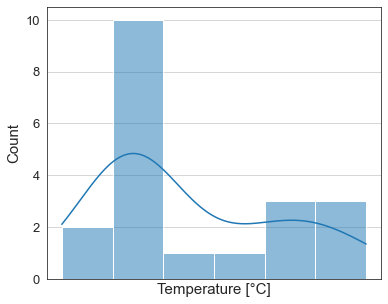

In [50]:
sns.set_style("white")
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5),  sharex=True)
#fig.suptitle('Distributions of Model Target Temperatures')
sns.histplot(ax=ax1, data=strang_data, x='TempMittelLsInC', kde=True,color=sns.color_palette()[0] )
ax1.set(xticks=[]) 
ax1.set_xlabel('Temperature [°C]', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.xaxis.grid(False)
ax1.yaxis.grid(True)
plt.yticks(fontsize=13)


(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

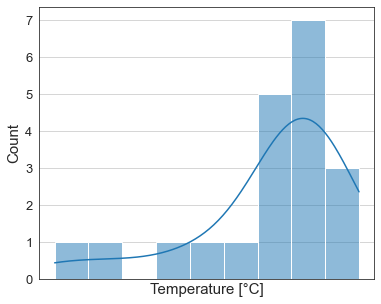

In [51]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5),  sharex=True)
#fig.suptitle('Distributions of Model Target Temperatures')

sns.histplot(ax=ax1, data=strang_data, x='TempMittelFsInC', kde=True, color=sns.color_palette()[0] )
ax1.set(xticks=[]) 
ax1.set_xlabel('Temperature [°C]', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.xaxis.grid(False)
ax1.yaxis.grid(True)
plt.yticks(fontsize=13)


(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

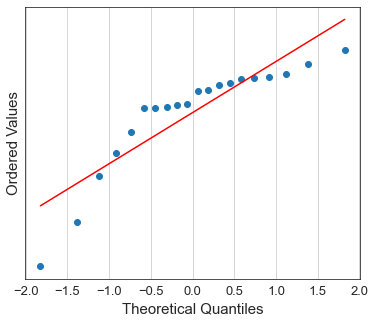

In [52]:
fig, ax1 = plt.subplots(1,  figsize=(6, 5),  sharex=True)
res = stats.probplot(strang_data['TempMittelFsInC'], plot=plt)
ax1.xaxis.grid(True)
ax1.yaxis.grid(False)
ax1.set(yticks=[]) 
ax1.set_title('')
ax1.get_lines()[0].set_color(color=sns.color_palette()[0])
ax1.set_xlabel('Theoretical Quantiles', fontsize=15)
ax1.set_ylabel('Ordered Values', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)


(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

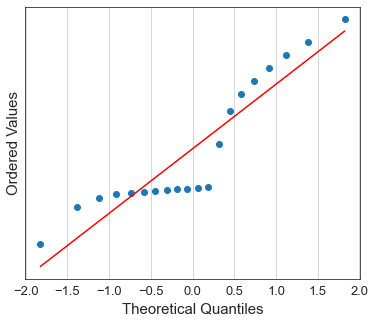

In [53]:
fig, ax1 = plt.subplots(1,  figsize=(6, 5),  sharex=True)
res = stats.probplot(strang_data['TempMittelLsInC'], plot=plt)
ax1.xaxis.grid(True)
ax1.yaxis.grid(False)
ax1.set(yticks=[]) 
ax1.set_title('')
ax1.get_lines()[0].set_color(color=sns.color_palette()[0])
ax1.set_xlabel('Theoretical Quantiles', fontsize=15)
ax1.set_ylabel('Ordered Values', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)


([<matplotlib.axis.XTick at 0x1f86f9af7f0>,
 [Text(0, 0, 'Temperature of Loose Side'),
  Text(1, 0, 'Temperature of Fixed Side')])

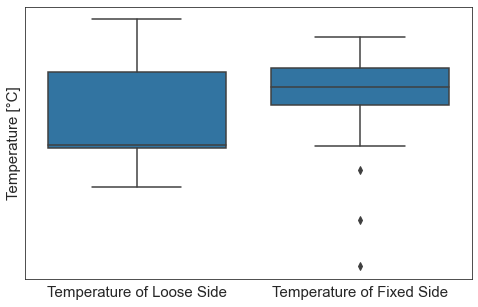

In [54]:
fig, ax1 = plt.subplots(1,  figsize=(8, 5),  sharex=True)
data = strang_data.copy()
data.rename(columns={'TempMittelLsInC':'Temperature of Loose Side',
                                   'TempMittelFsInC':'Temperature of Fixed Side' },
                  inplace=True),
sns.boxplot(data=data,
            order=['Temperature of Loose Side','Temperature of Fixed Side'], ax=ax1, color=sns.color_palette()[0] )
ax1.set_ylabel('Temperature [°C]', fontsize=15)
ax1.set(yticks=[]) 
plt.xticks([0, 1], ['Temperature of Loose Side', 'Temperature of Fixed Side'], fontsize=15 )


(array([0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

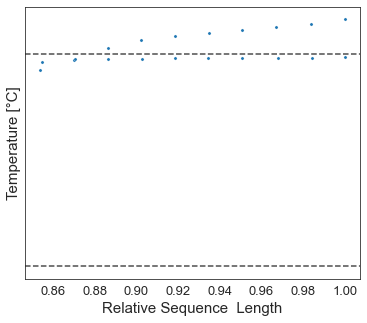

In [55]:
grouped_end = strang_data.groupby('seq_id')
str_data = {}
strang_data_test = pd.DataFrame()
length_cc4 = 15.42
for name, group in grouped_end:
    group['max_seq_length'] = group['GiessLaengeSequenzInM'].max()
    str_data[name] = group.copy()      
    strang_data_test = pd.concat([strang_data_test,str_data[name]], axis=0)

strang_data_test['rel_seq_len'] =  strang_data_test['GiessLaengeSequenzInM'] / strang_data_test['max_seq_length'] 

var = 'rel_seq_len'
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5),  sharex=True)
sns.scatterplot(data=strang_data_test,
                y='TempMittelLsInC', x=var, ax=ax1, s=10, color=sns.color_palette()[0])
ax1.axhline(650, ls='--', color='black', alpha=0.7)
ax1.axhline(765, ls='--', color='black',alpha=0.7)
ax1.set_xlabel('Relative Sequence  Length', fontsize=15)
ax1.set_ylabel('Temperature [°C]', fontsize=15)
ax1.set(yticks=[]) 
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

(array([0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

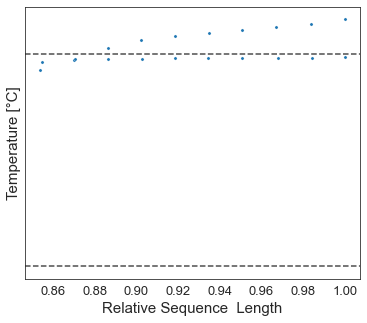

In [56]:
grouped_end = strang_data.groupby('seq_id')
str_data = {}
strang_data_test = pd.DataFrame()
length_cc4 = 15.42
for name, group in grouped_end:
    group['max_seq_length'] = group['GiessLaengeSequenzInM'].max()
    str_data[name] = group.copy()      
    strang_data_test = pd.concat([strang_data_test,str_data[name]], axis=0)

strang_data_test['rel_seq_len'] =  strang_data_test['GiessLaengeSequenzInM'] / strang_data_test['max_seq_length'] 

var = 'rel_seq_len'
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5),  sharex=True)
sns.scatterplot(data=strang_data_test,
                y='TempMittelLsInC', x=var, ax=ax1, s=10, color=sns.color_palette()[0])
ax1.axhline(650, ls='--', color='black', alpha=0.7)
ax1.axhline(765, ls='--', color='black',alpha=0.7)
ax1.set_xlabel('Relative Sequence  Length', fontsize=15)
ax1.set_ylabel('Temperature [°C]', fontsize=15)
ax1.set(yticks=[]) 
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)



(array([0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

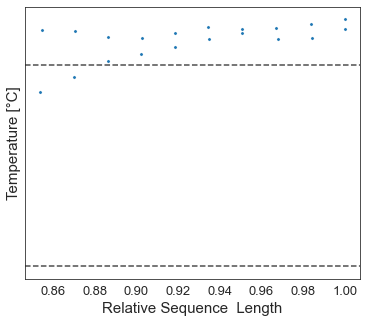

In [57]:
var = 'rel_seq_len'
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5),  sharex=True)
sns.scatterplot(data=strang_data_test,
                y='TempMittelFsInC', x=var, ax=ax1,s=10, color=sns.color_palette()[0])
ax1.axhline(652, ls='--', color='black', alpha=0.7)
ax1.axhline(757, ls='--', color='black',alpha=0.7)
ax1.set_xlabel('Relative Sequence  Length', fontsize=15)
ax1.set_ylabel('Temperature [°C]', fontsize=15)
ax1.set(yticks=[]) 
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

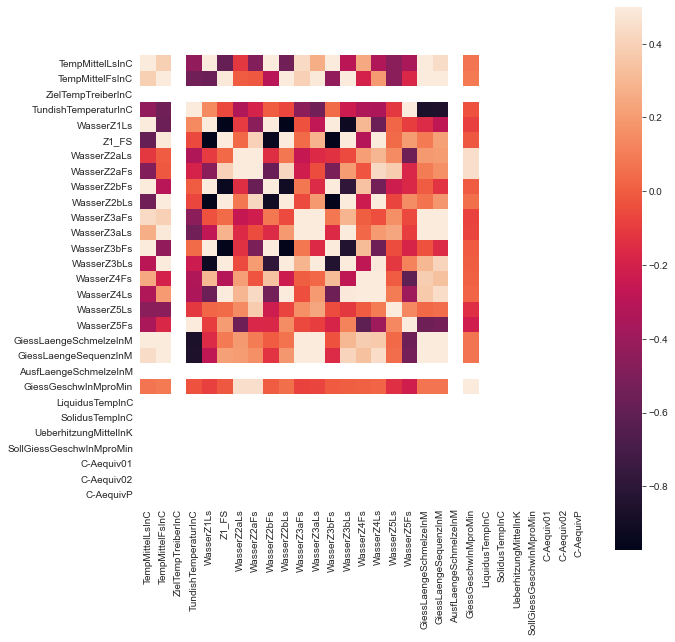

In [58]:
#correlation matrix
data = strang_data[numerical_attributes]
data.rename(columns={'WasserZ1FsInLproMin_integr':'Z1_FS',
                           'WasserZ1LsInLproMin_integr':'WasserZ1Ls',
                           'WasserZ2aFsInLproMin_integr':'WasserZ2aFs',
                           'WasserZ2aLsInLproMin_integr':'WasserZ2aLs',
                           'WasserZ2bFsInLproMin_integr':'WasserZ2bFs',
                           'WasserZ2bLsInLproMin_integr':'WasserZ2bLs',
                           'WasserZ3aFsInLproMin_integr':'WasserZ3aFs',
                           'WasserZ3aLsInLproMin_integr':'WasserZ3aLs',
                           'WasserZ3bFsInLproMin_integr':'WasserZ3bFs',
                           'WasserZ3bLsInLproMin_integr':'WasserZ3bLs',
                           'WasserZ4FsInLproMin_integr':'WasserZ4Fs',
                           'WasserZ4LsInLproMin_integr':'WasserZ4Ls',
                           'WasserZ5FsInLproMin_integr':'WasserZ5Fs',
                           'WasserZ5LsInLproMin_integr':'WasserZ5Ls',
                          },
                  inplace=True)



corrmat = data.corr()

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.5, square=True);
plt.tight_layout

In [59]:
water_keys =  ['WasserZ4FsInLproMin_integr',
 'WasserZ4LsInLproMin_integr',
 'WasserZ2bFsInLproMin_integr',
 'WasserZ2bLsInLproMin_integr',
 'WasserZ3bFsInLproMin_integr',
 'WasserZ1FsInLproMin_integr',
 'WasserZ3bLsInLproMin_integr',
 'WasserZ1LsInLproMin_integr',
 'WasserZ3aFsInLproMin_integr',
 'WasserZ3aLsInLproMin_integr',
 'WasserZ2aLsInLproMin_integr',
 'WasserZ2aFsInLproMin_integr',
 'WasserZ5LsInLproMin_integr',
 'WasserZ5FsInLproMin_integr',
 ]

water_data = strang_data[water_keys]
water_data.rename(columns={'WasserZ1FsInLproMin_integr':'Z1_FS',
                           'WasserZ1LsInLproMin_integr':'Z1_LS',
                           'WasserZ2aFsInLproMin_integr':'Z2a_FS',
                           'WasserZ2aLsInLproMin_integr':'Z2a_LS',
                           'WasserZ2bFsInLproMin_integr':'Z2b_FS',
                           'WasserZ2bLsInLproMin_integr':'Z2b_LS',
                           'WasserZ3aFsInLproMin_integr':'Z3a_FS',
                           'WasserZ3aLsInLproMin_integr':'Z3a_LS',
                           'WasserZ3bFsInLproMin_integr':'Z3b_FS',
                           'WasserZ3bLsInLproMin_integr':'Z3b_LS',
                           'WasserZ4FsInLproMin_integr':'Z4_FS',
                           'WasserZ4LsInLproMin_integr':'Z4_LS',
                           'WasserZ5FsInLproMin_integr':'Z5_FS',
                           'WasserZ5LsInLproMin_integr':'Z5_LS',
                          },
                  inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Z4_FS'),
  Text(1, 0, 'Z4_LS'),
  Text(2, 0, 'Z2b_FS'),
  Text(3, 0, 'Z2b_LS'),
  Text(4, 0, 'Z3b_FS'),
  Text(5, 0, 'Z1_FS'),
  Text(6, 0, 'Z3b_LS'),
  Text(7, 0, 'Z1_LS'),
  Text(8, 0, 'Z3a_FS'),
  Text(9, 0, 'Z3a_LS'),
  Text(10, 0, 'Z2a_LS'),
  Text(11, 0, 'Z2a_FS'),
  Text(12, 0, 'Z5_LS'),
  Text(13, 0, 'Z5_FS')])

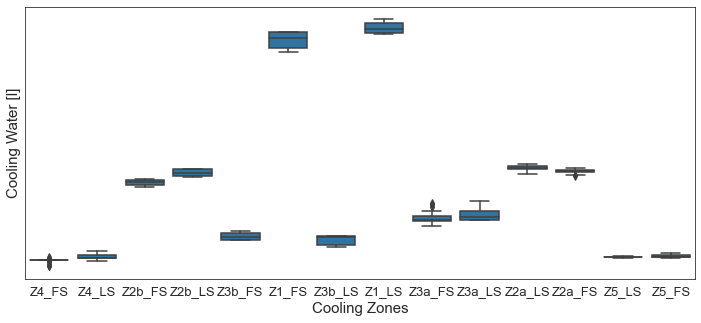

In [60]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5),  sharex=True)
sns.boxplot(data=water_data, color=sns.color_palette()[0], ax=ax1)
ax1.set_xlabel('Cooling Zones', fontsize=15)
ax1.set_ylabel('Cooling Water [l]', fontsize=15)
ax1.set(yticks=[]) 
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

### Look at single sequences

In [61]:
strang_data.head()

,DATE_TIME,TundishTemperaturInC,TIME,TempMittelLsInC,TempMittelLsInC_old,TempMittelFsInC,TempMittelFsInC_old,WasserZ4FsInLproMin,WasserZ4FsInLproMin_integr,WasserZ4LsInLproMin,WasserZ4LsInLproMin_integr,WasserZ2bFsInLproMin,WasserZ2bFsInLproMin_integr,WasserZ2bLsInLproMin,WasserZ2bLsInLproMin_integr,WasserZ3bFsInLproMin,WasserZ3bFsInLproMin_integr,WasserZ1FsInLproMin,WasserZ1FsInLproMin_integr,WasserZ3bLsInLproMin,WasserZ3bLsInLproMin_integr,WasserZ1LsInLproMin,WasserZ1LsInLproMin_integr,WasserZ3aFsInLproMin,WasserZ3aFsInLproMin_integr,WasserZ3aLsInLproMin,WasserZ3aLsInLproMin_integr,WasserZ2aLsInLproMin,WasserZ2aLsInLproMin_integr,WasserZ2aFsInLproMin,WasserZ2aFsInLproMin_integr,WasserZ5LsInLproMin,WasserZ5LsInLproMin_integr,WasserZ5FsInLproMin,WasserZ5FsInLproMin_integr,WasserZ1DiefflenInLproMin,WasserZ1DiefflenInLproMin_integr,WasserZ1DillingenInLproMin,WasserZ1DillingenInLproMin_integr,GiessLaengeSchmelzeInM,GiessLaengeSequenzInM,AusfLaengeSchmelzeInM,GiessGeschwInMproMin,GiessGeschwInMproMin_integr,ChargenNr,ChargenNrErsteSchmInSeq,GiessBeginnSchmelze,GiessBeginn_DateTime,GiessEndeSchmelze,GiessEnde_DateTime,EndeSchmelze,Ende_DateTime,NrSchmelzeInSequenz,LiquidusTempInC,SolidusTempInC,UeberhitzungMittelInK,ZielTempTreiberInC,SollGiessGeschwInMproMin,Format,C-Aequiv01,C-Aequiv02,C-AequivP,GiessLaengeSequenzInM_delta,AusfLaengeSchmelzeInM_delta,GiessLaengeSchmelzeInM_delta,strang_nr,seq_id,Format_2235
0,2019-05-15 12:34:00+00:00,1578.0,1557923640,755.942857,757.871429,742.784615,744.861538,74.886566,74.886566,76.689434,76.665506,163.090939,163.051954,166.846600,166.991845,106.398389,104.909320,305.525558,308.814268,90.135542,89.911391,335.899460,339.779634,118.393186,118.368855,119.146644,119.130424,181.729786,178.693377,174.114357,172.980478,79.069299,78.958822,78.526595,78.460309,49.900090,49.844144,49.664922,49.407342,2.768705,16.633295,0.0,0.314564,0.315025,471720,471719,1.557923e+09,2019-05-15 12:25:25.250000+00:00,1.557926e+09,2019-05-15 13:18:27.960000038+00:00,1.557926e+09,2019-05-15 13:18:27.960000+00:00,2,1517.8,1469.713,39.2,720,0.315,2235,0.3245,0.33695,0.140286,0.315737,0.0,0.315148,1,471719_str_1,1.0
1,2019-05-15 12:35:00+00:00,1578.0,1557923700,761.562987,765.254545,750.493269,756.125000,74.886566,74.886566,76.737291,76.713363,163.270294,163.180617,167.006111,166.926356,103.217814,104.808102,312.551411,309.038485,89.441899,89.788720,345.500903,340.700182,118.441849,118.417518,119.179085,119.162865,171.071740,176.400763,171.861645,172.988001,79.290254,79.179776,84.656269,81.591432,50.011982,49.956036,50.180080,49.922501,3.083852,16.949032,0.0,0.314168,0.314366,471720,471719,1.557923e+09,2019-05-15 12:25:25.250000+00:00,1.557926e+09,2019-05-15 13:18:27.960000038+00:00,1.557926e+09,2019-05-15 13:18:27.960000+00:00,2,1517.8,1469.713,39.2,720,0.315,2235,0.3245,0.33695,0.140286,0.315737,0.0,0.315148,1,471719_str_1,1.0
2,2019-05-15 12:36:00+00:00,1578.0,1557923760,768.127273,771.000000,758.612500,761.100000,74.886566,74.886566,76.785148,76.761219,163.449650,163.359972,167.290090,167.148100,107.013481,105.115648,301.952163,307.251787,90.066398,89.754148,331.501435,338.501169,118.490511,118.466180,119.211527,119.195306,168.589164,169.830452,165.636417,168.749031,77.669412,78.479833,76.692354,80.674312,50.123874,50.067928,50.980903,50.580492,3.397459,17.263328,0.0,0.313426,0.313797,471720,471719,1.557923e+09,2019-05-15 12:25:25.250000+00:00,1.557926e+09,2019-05-15 13:18:27.960000038+00:00,1.557926e+09,2019-05-15 13:18:27.960000+00:00,2,1517.8,1469.713,39.2,720,0.315,2235,0.3245,0.33695,0.140286,0.314296,0.0,0.313607,1,471719_str_1,1.0
3,2019-05-15 12:37:00+00:00,1578.0,1557923820,772.271277,773.542553,762.600000,764.100000,74.886566,74.886566,76.833005,76.809076,163.629005,163.539328,167.574068,167.432079,104.866174,105.939828,313.902069,307.927116,91.223211,90.644804,344.744344,338.122889,118.539174,118.514842,119.243968,119.227747,182.049859,175.319512,175.574759,170.605588,77.686658,77.678035,77.008525,76.850439,50.

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

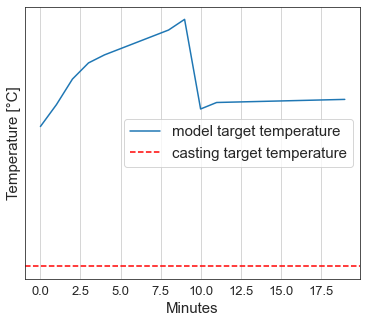

In [62]:
fig1, (ax1) = plt.subplots(1, figsize=(6, 5))
sns.lineplot(data=strang_data.reset_index(drop=True),
             y='TempMittelLsInC',x=strang_data.reset_index(drop=True).index,
             ax=ax1, label='model target temperature')
ax1.axhline(720, ls='--', color='red', label='casting target temperature' )
ax1.set_xlabel('Minutes', fontsize=15)
ax1.set_ylabel('Temperature [°C]',fontsize=15)
ax1.set(yticks=[]) 
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)
ax1.legend(prop={'size': 15})
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

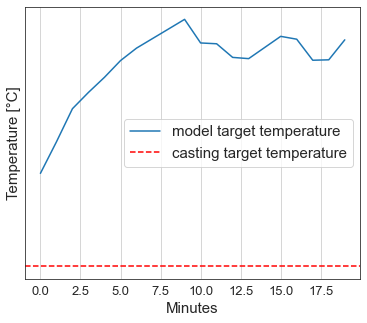

In [63]:
fig1, (ax1) = plt.subplots(1, figsize=(6, 5))
sns.lineplot(data=strang_data.reset_index(drop=True),
             y='TempMittelFsInC',x=strang_data.reset_index(drop=True).index,
             ax=ax1, label='model target temperature')
ax1.axhline(720, ls='--', color='red', label='casting target temperature' )
ax1.set_xlabel('Minutes', fontsize=15)
ax1.set_ylabel('Temperature [°C]',fontsize=15)
ax1.set(yticks=[]) 
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)
ax1.legend(prop={'size': 15})
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

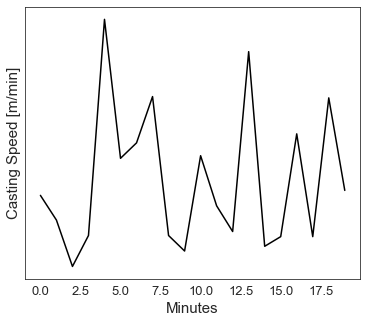

In [64]:
fig5, (ax1) = plt.subplots(1, figsize=(6, 5))
sns.lineplot(data=strang_data.reset_index(drop=True),
             y='GiessGeschwInMproMin',x=strang_data.reset_index(drop=True).index,
             ax=ax1, color='black')
ax1.set_xlabel('Minutes', fontsize=15)
ax1.set_ylabel('Casting Speed [m/min]', fontsize=15)
ax1.set(yticks=[]) 
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

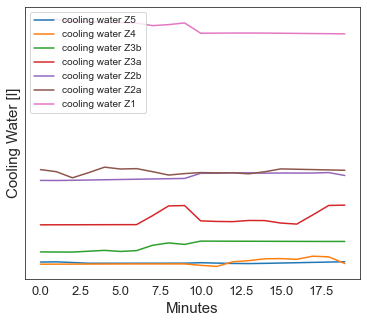

In [65]:
seq_number = '474947_str_1'
fig6, (ax1) = plt.subplots(1,1, figsize=(6, 5))
sns.lineplot(data=strang_data.reset_index(drop=True),
             y='WasserZ5LsInLproMin_integr',x=strang_data.reset_index(drop=True).index,
             ax=ax1, label='cooling water Z5')
sns.lineplot(data=strang_data.reset_index(drop=True),
             y='WasserZ4LsInLproMin_integr',x=strang_data.reset_index(drop=True).index,
             ax=ax1, label='cooling water Z4')
sns.lineplot(data=strang_data.reset_index(drop=True),
             y='WasserZ3bLsInLproMin_integr',x=strang_data.reset_index(drop=True).index,
             ax=ax1, label='cooling water Z3b')
sns.lineplot(data=strang_data.reset_index(drop=True),
             y='WasserZ3aLsInLproMin_integr',x=strang_data.reset_index(drop=True).index,
             ax=ax1, label='cooling water Z3a')
sns.lineplot(data=strang_data.reset_index(drop=True),
             y='WasserZ2bLsInLproMin_integr',x=strang_data.reset_index(drop=True).index,
             ax=ax1, label='cooling water Z2b')
sns.lineplot(data=strang_data.reset_index(drop=True),
             y='WasserZ2aLsInLproMin_integr',x=strang_data.reset_index(drop=True).index,
             ax=ax1, label='cooling water Z2a')
sns.lineplot(data=strang_data.reset_index(drop=True),
             y='WasserZ1LsInLproMin_integr',x=strang_data.reset_index(drop=True).index,
             ax=ax1, label='cooling water Z1')

ax1.set_xlabel('Minutes', fontsize=15)
ax1.set_ylabel('Cooling Water [l]', fontsize=15)
ax1.set(yticks=[]) 
ax1.legend(prop={'size': 10})
ax1.legend(loc='upper left')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

